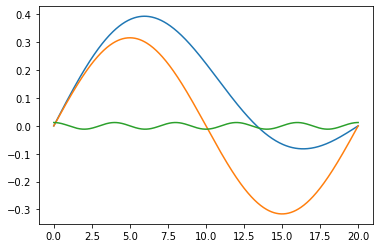

In [8]:
from wpspec import pib
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

params = {'box_length': 20, 'grid_points': 500,'system': 'pib'}

pi = pib(params)


pi.dt = 0.1

pi.Psi = np.sqrt(1/2) * pi.eigenfunction(1) + np.sqrt(1/2) * pi.eigenfunction(2)

pi.expand_pib()
pi.periodic_potential()
pi.V *= 1e-1

plt.plot(pi.x, pi.Psi)
plt.plot(pi.x, pi.phi[:,1])
plt.plot(pi.x, pi.V)



In [9]:
pi.finite_difference_T_matrix()
pi.finite_difference_V_matrix()
pi.finite_difference_H_matrix()

1

(0.012176461886402007+0j)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


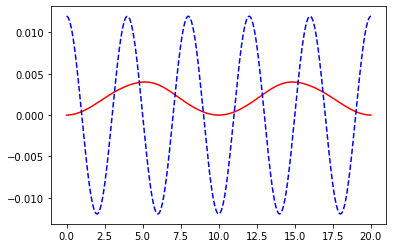

In [14]:
from scipy.sparse.linalg import eigs

vals, vecs = eigs(pi.H_matrix, k=5,  which='SM')
print(vals[0])

plt.plot(pi.x, vecs[:,1]**2, 'red')
plt.plot(pi.x, pi.V, 'b--')
#plt.ylim(0,0.005)
plt.show()